In [1]:
%cd ..

/mnt/s/Keep working hard/projects/python/farich-pics


In [2]:
from farichlib.DataPreprocessing import DataPreprocessing

In [3]:
dp = DataPreprocessing('data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root')

In [4]:
X, y = dp.get_images()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse, Circle

%matplotlib inline

In [6]:
y[0]

array([50, 50, 13])

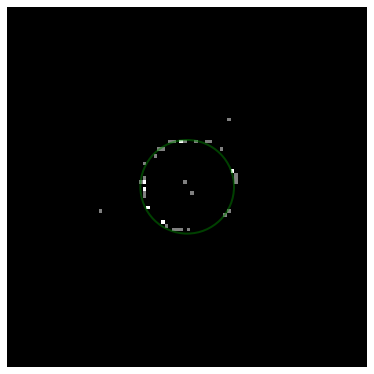

In [7]:
loc_ind = 5
xv = y[loc_ind][0]
yv = y[loc_ind][1]
r = y[loc_ind][2]

fig = plt.figure(frameon=False, figsize=(5, 5) )
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

H = X[loc_ind].toarray()
xedges = np.linspace(0, 100, H.shape[0])
yedges = np.linspace(0, 100, H.shape[1])
Xg, Yg = np.meshgrid(xedges, yedges)
e = Circle(xy=(xv, yv), radius=r, linewidth=2, fill=False, edgecolor='green', alpha=0.5)
ax.pcolormesh(Xg, Yg, H, cmap='gray')
ax.add_artist(e)
# plt.scatter(xv, yv, marker='+', s=150)